In [1]:
!pip install bnlp_toolkit
!pip install python-docx
!pip install nltk
!pip install --upgrade matplotlib

In [2]:
import matplotlib.pyplot as plt
import os
from docx import Document
from bnlp import CleanText
from bnlp import BengaliPOS
from nltk.tokenize import word_tokenize
from collections import Counter

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
def map_to_universal(pos_tag):
    """
    Maps the given part-of-speech tag to the Universal POS tagset.

    Returns:
        str: The corresponding Universal POS tagset tag.
    """
    # Define mappings
    mapping = {
        ('NC'): 'NOUN',
        ('NP'): 'NOUN',
        ('NV'): 'NOUN',
        ('NST'):'NOUN',
        ('VM'): 'VERB',
        ('VA'): 'VERB',
        ('PPR'): 'PRON',
        ('PRF'): 'PRON',
        ('PRC'): 'PRON',
        ('PRL'): 'PRON',
        ('PWH'): 'PRON',
        ('JJ'): 'ADJ',
        ('JQ'): 'NUM',
        ('DAB'): 'DET', # Demonstrative Absolute
        ('DRL'): 'DET', # Demonstrative Relative
        ('DWH'): 'DET',  # Demonstrative Wh (or possibly 'PRON' if used as pronoun)
        ('AMN'): 'ADV',
        ('ALC'): 'ADV',
        ('LV'): 'VERB',
        ('LC'): 'PART',
        ('CCD'): 'CCONJ',
        ('CSB'): 'SCONJ',  # Subordinating conjunction particle
        ('CCL'): 'PART',  # Classifier particle
        ('CIN'): 'INTJ',
        ('CX'): 'X',
        ('PP'): 'ADP',
        ('PU'): 'PUNCT',
        ('RDF'): 'X',
        ('RDS'): 'X', # Residual Symbol
        ('RDX'): 'X'


    }

    # Lookup the mapping
    universal_tag = mapping.get((pos_tag), 'X')

    return universal_tag



In [4]:
def process_string(document_path):
    try:
        # Check if the file exists
        if not os.path.exists(document_path):
            print(f"File not found: {document_path}")
            return ""

        # Check if the file is empty (zero bytes)
        if os.path.getsize(document_path) == 0:
            print(f"Ignoring empty file: {document_path}")
            return ""

        # Load the Word document
        doc = Document(document_path)

        # Initialize an empty string to store the text content
        document_text = ""

        # Iterate over paragraphs in the document
        for paragraph in doc.paragraphs:
            # Append the text of each paragraph to the document_text string
            document_text += paragraph.text + "\n"

        clean_text = CleanText(
            fix_unicode=True,
            unicode_norm=True,
            unicode_norm_form="NFKC",
            remove_url=False,
            remove_email=False,
            remove_emoji=False,
            remove_number=False,
            remove_digits=False,
            remove_punct=False,
        )

        clean_text = clean_text(document_text)
        tokens = word_tokenize(clean_text)
        tokens = ' '.join(tokens)

        bn_pos = BengaliPOS()

        res = bn_pos.tag(tokens)
        res = [list(t) for t in res]

        result_string = ""

        for item in res:
            item[1] = map_to_universal(item[1])

        for item in res:
            result_string = result_string + " " + item[1]

        return result_string

    except Exception as e:
        print(f"Error processing file {document_path}: {e}")
        return ""


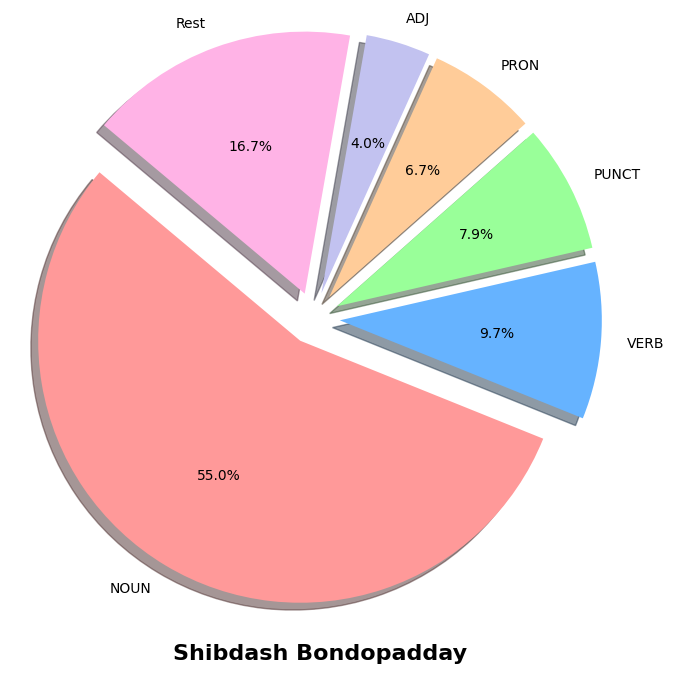

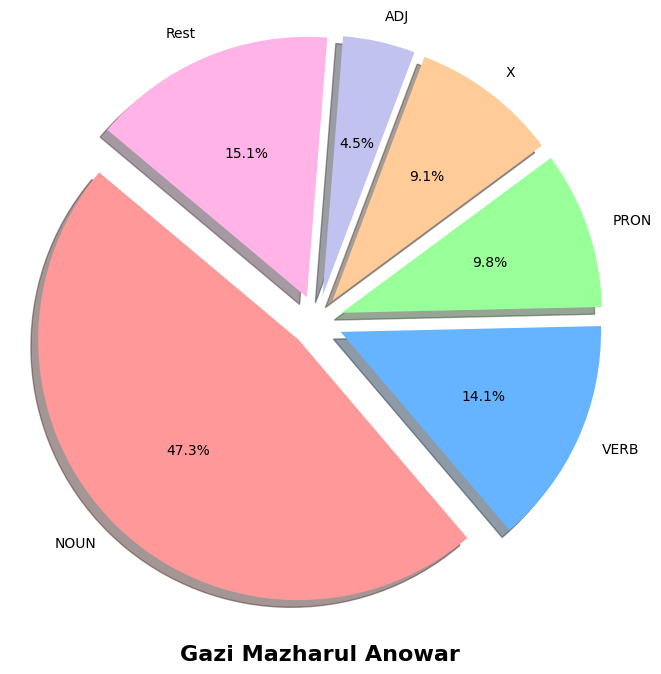

Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song40_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song47_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song50_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song46_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song45_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song42_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song43_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song41_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song48_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song49_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Fokir Lalon Shai/song44_.docx
Ignoring e

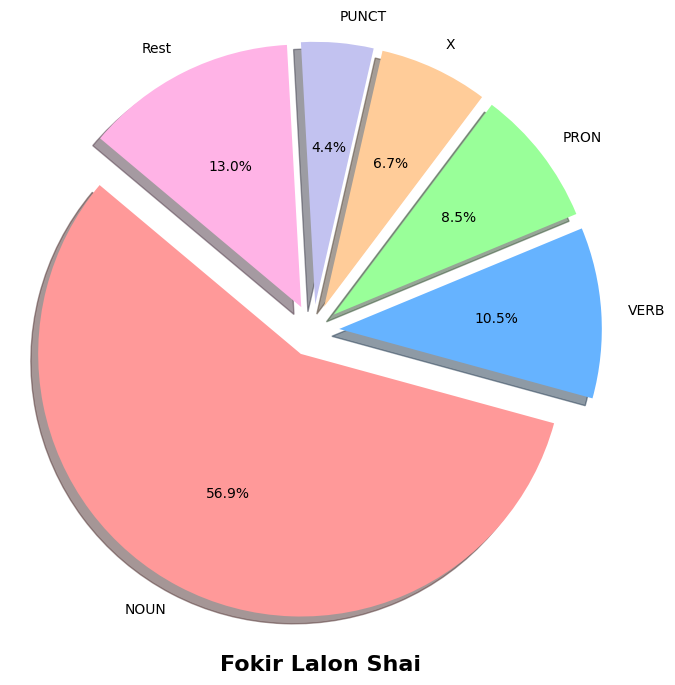

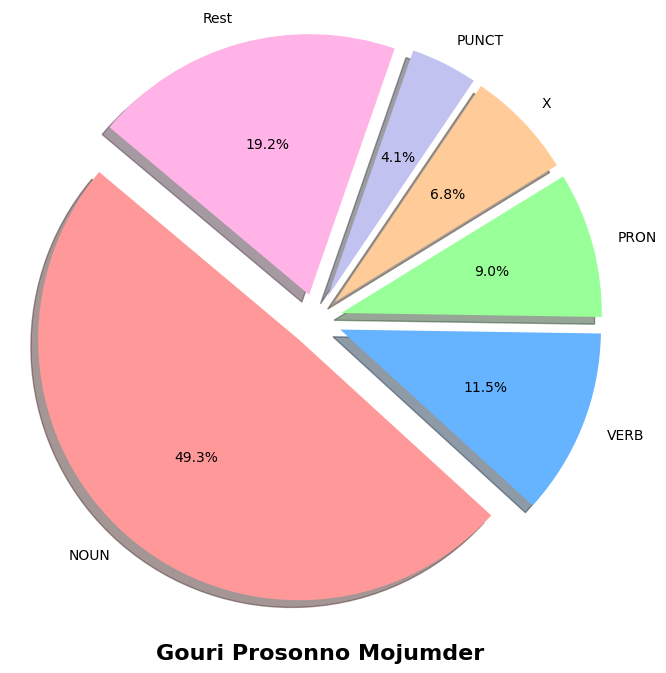

Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song330_নিশি না পোহাতে যেয়ো না যেয়ো না.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song416_যত ফুল তত ভুল কণ্টক জাগে.docx


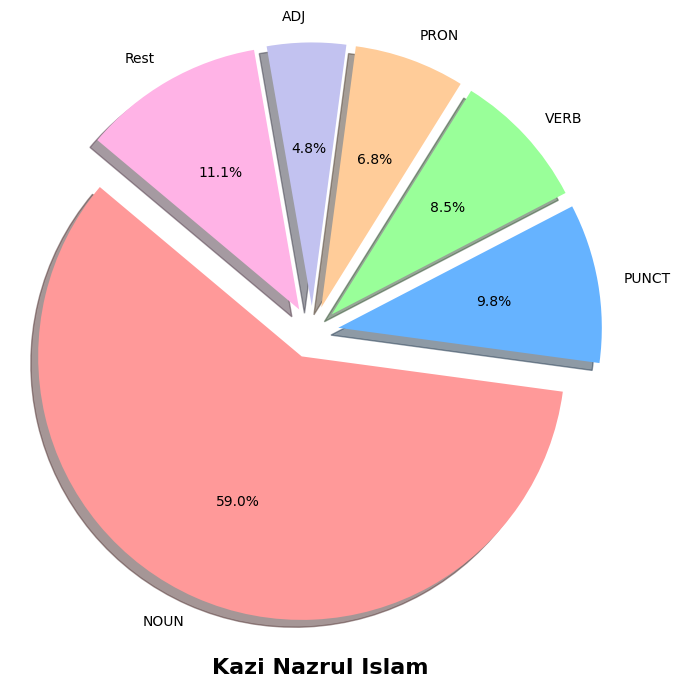

Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Kabir Bokul/song24_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Kabir Bokul/song23_.docx
Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Kabir Bokul/song25_.docx


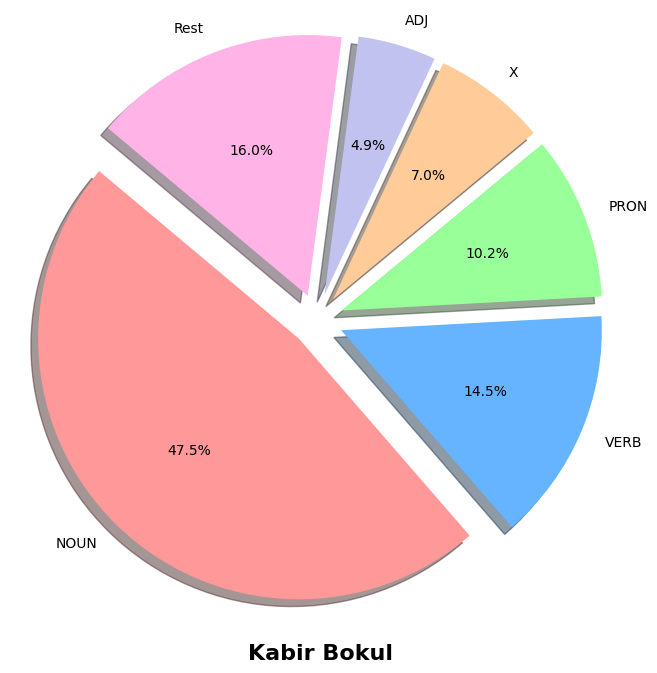

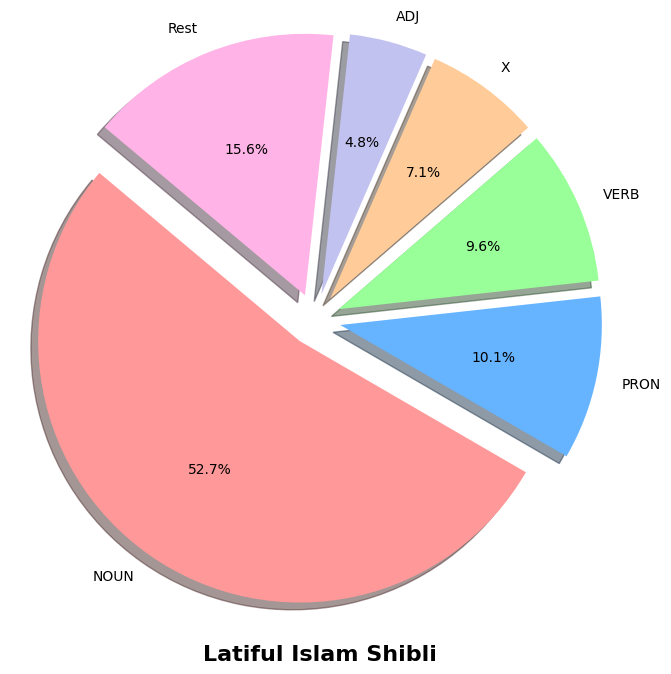

Ignoring empty file: /content/BanglaMusicStylo Dataset/Data/Rabindra Nath Tagore/song687_এসেছিলে তবু আস নাই জানায়ে গেলে.docx
Error processing file /content/BanglaMusicStylo Dataset/Data/Rabindra Nath Tagore/~$ng515_রাজপুরীতে বাজায় বাঁশি বেলাশেষের তান.docx: Package not found at '/content/BanglaMusicStylo Dataset/Data/Rabindra Nath Tagore/~$ng515_রাজপুরীতে বাজায় বাঁশি বেলাশেষের তান.docx'


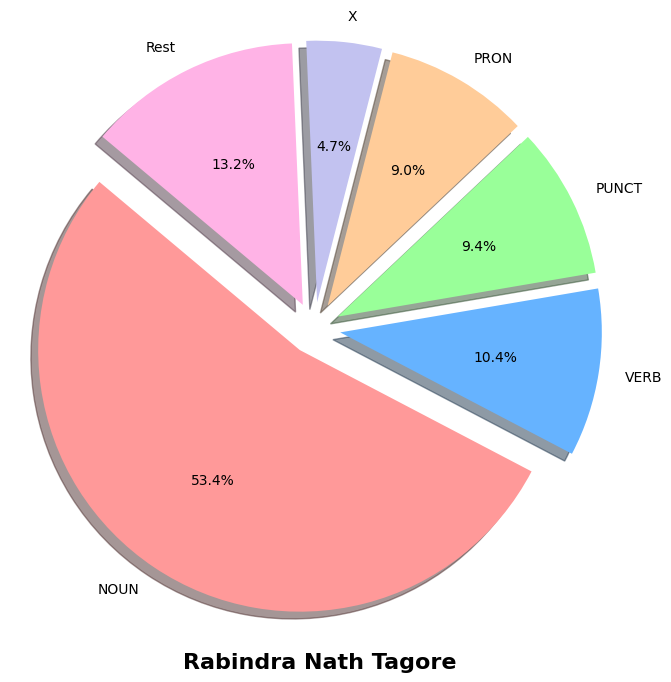

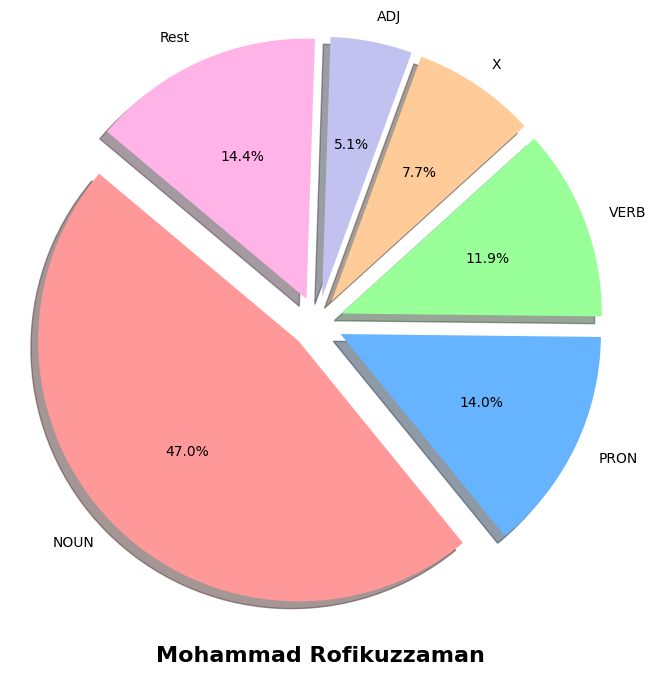

Error processing file /content/BanglaMusicStylo Dataset/Data/Pulok Bondhopadday/~$ng36_আমি মিস্ ক্যালকাটা.docx: Package not found at '/content/BanglaMusicStylo Dataset/Data/Pulok Bondhopadday/~$ng36_আমি মিস্ ক্যালকাটা.docx'


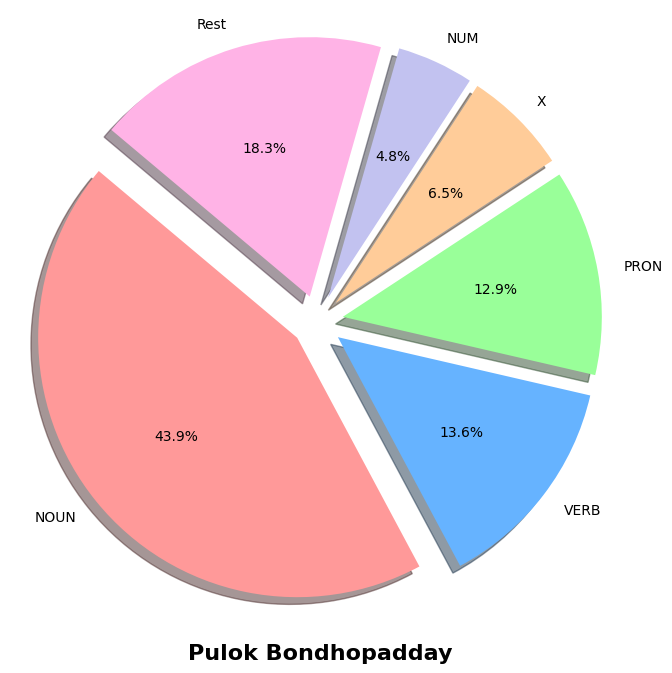

In [6]:
# Define source and destination paths
my_list = ['Rabindra Nath Tagore', 'Kazi Nazrul Islam', 'Gazi Mazharul Anowar', 'Pulok Bondhopadday', 'Gouri Prosonno Mojumder', 'Fokir Lalon Shai', 'Latiful Islam Shibli', 'Shibdash Bondopadday', 'Kabir Bokul', 'Mohammad Rofikuzzaman']
source_dir = '/content/BanglaMusicStylo Dataset/Data'
output_dir = '/content/pie_charts'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Color palette
# Define a list of 6 colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Iterate through folders
for folder in os.listdir(source_dir):
    # Construct source folder path
    folder_path = os.path.join(source_dir, folder)

    # Check if folder is in my_list
    if folder in my_list:
        artist_POS = ""

        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            # Construct source and destination file paths
            source_file_path = os.path.join(folder_path, file_name)
            processed_content = process_string(source_file_path)
            artist_POS += processed_content

        artist_POS = artist_POS.split()

        # Compute the frequency distribution
        frequency_distribution = Counter(artist_POS)

        # Keep top 5 components and combine the rest into 'Other' category
        top_components = list(frequency_distribution.most_common(5))
        other_count = sum(frequency_distribution.values()) - sum(count for _, count in top_components)
        top_components.append(('Rest', other_count))

        # Extract labels and sizes from the frequency distribution
        labels, sizes = zip(*top_components)

        # Determine the number of slices
        num_slices = len(labels)

        # Explode slices (if there are more than one slice)
        explode = [0.1] * num_slices  # Explode all slices by the same amount

        # Create a pie chart with unique colors for each slice
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors[:num_slices], explode=explode, shadow=True)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(folder, pad=20, fontsize=16, fontweight='bold', y=-0.1)  # Adjust the title position and font properties

        # Save the pie chart to a file
        output_file_path = os.path.join(output_dir, f'{folder}_pie_chart.png')
        plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0.1)  # Adjust padding

        # Display the pie chart
        plt.show()


In [1]:
!unzip /content/BanglaMusicStyloDataset.zip

Streaming output truncated to the last 5000 lines.
BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song65_মোরা ঝঞ্ঝার মত উদ্দাম.docx:  mismatching "local" filename (BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song65_ржорзЛрж░рж╛ ржЭржЮрзНржЭрж╛рж░ ржоржд ржЙржжрзНржжрж╛ржо.docx),
         continuing with "central" filename version
  inflating: BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song65_মোরা ঝঞ্ঝার মত উদ্দাম.docx  
BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song66_আধো রাতে যদি ঘুম ভেঙ্গে যায়.docx:  mismatching "local" filename (BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song66_ржЖржзрзЛ рж░рж╛рждрзЗ ржпржжрж┐ ржШрзБржо ржнрзЗржЩрзНржЧрзЗ ржпрж╛рзЯ.docx),
         continuing with "central" filename version
  inflating: BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song66_আধো রাতে যদি ঘুম ভেঙ্গে যায়.docx  
BanglaMusicStylo Dataset/Data/Kazi Nazrul Islam/song67_আলগা করো গো খোপার বাঁধন.docx:  mismatching "local" filename (BanglaMusicStylo Dataset/Data/Kazi Nazrul